<a href="https://colab.research.google.com/github/arpit0020/hotel-review/blob/main/EDA_Task1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
from google.colab import files
uploded =  files.upload()

Saving hotel_reviews (2) (1).xlsx to hotel_reviews (2) (1).xlsx


### Step1. Load and Inspect Data

In [9]:
# Load Dataset
df = pd.read_excel("hotel_reviews (2) (1).xlsx")
df.head(5)

,Review,Rating,@
0,nice hotel expensive parking got good deal sta...,4,NaN
1,ok nothing special charge diamond member hilto...,2,NaN
2,nice rooms not 4* experience hotel monaco seat...,3,NaN
3,"unique, great stay, wonderful time hotel monac...",5,NaN
4,"great stay great stay, went seahawk game aweso...",5,NaN


In [10]:
# Drop unnecessary columns
df = df.drop(columns=["@"], errors='ignore')
df.sample(6)

,Review,Rating
4306,smiles covent garden decided book basis really...,5
8062,held business meeting excellent service recent...,4
12218,superb service excellent staff arrived sydney ...,5
14743,"n't, planning visit resort n't money change re...",2
15469,great hotel did not join membership jan 1 2007...,5
5689,excellent price visit france/paris 3-4 times y...,5


In [11]:
df.shape

(20491, 2)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [13]:
# Basic Statistics
print("Total Reviews:", len(df))
print("Missing Values:")
print(df.isnull().sum())


Total Reviews: 20491
Missing Values:
Review    0
Rating    0
dtype: int64


>##### There is no missing values in the dataframe

In [14]:
df.dtypes

,0
Review,object
Rating,int64


In [15]:
df.duplicated().sum()

np.int64(0)

>##### No Duplicate Value In The Dataset

In [16]:
df.value_counts("Rating")

,count
Rating,
5,9054
4,6039
3,2184
2,1793
1,1421


### Step2. Basic Text Statistics

In [17]:
# Calculate total number of words in a review.
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split()))

# Calculate total number of characters in a review.
df['char_count'] = df['Review'].apply(lambda x: len(str(x)))

# Calculate number of unique words in a review.
df['unique_word_count'] = df['Review'].apply(lambda x: len(set(str(x).split())))

# Display the first few rows
df[['Review', 'word_count', 'char_count', 'unique_word_count']].head()



,Review,word_count,char_count,unique_word_count
0,nice hotel expensive parking got good deal sta...,87,593,77
1,ok nothing special charge diamond member hilto...,250,1689,188
2,nice rooms not 4* experience hotel monaco seat...,217,1427,161
3,"unique, great stay, wonderful time hotel monac...",89,600,75
4,"great stay great stay, went seahawk game aweso...",191,1281,160


In [18]:
df.describe()

,Rating,word_count,char_count,unique_word_count
count,20491.000000,20491.000000,20491.000000,20491.000000
mean,3.952223,104.375726,725.245571,86.508272
std,1.233030,100.656154,689.933070,71.330010
min,1.000000,7.000000,44.000000,7.000000
25%,3.000000,48.000000,339.000000,44.000000
50%,4.000000,77.000000,537.000000,67.000000
75%,5.000000,124.000000,859.000000,105.000000
max,5.000000,1931.000000,13501.000000,1205.000000


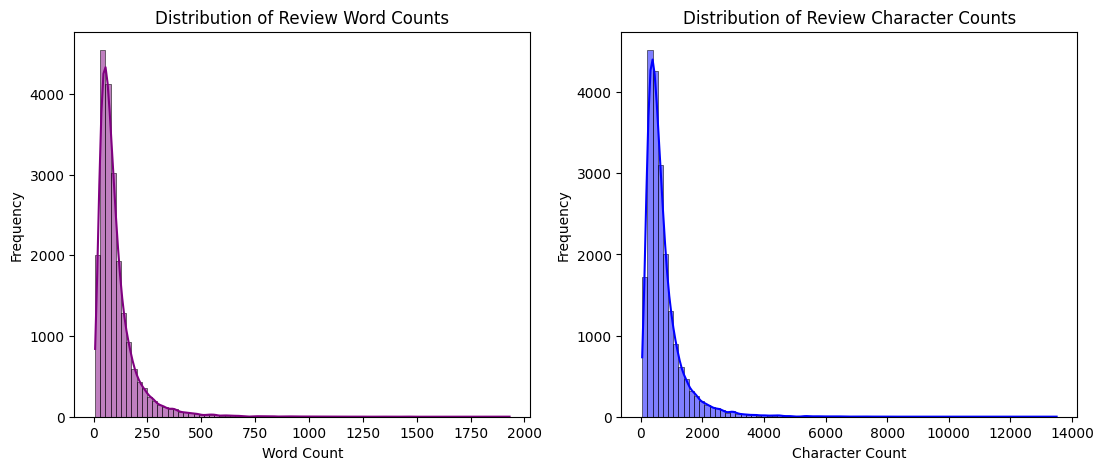

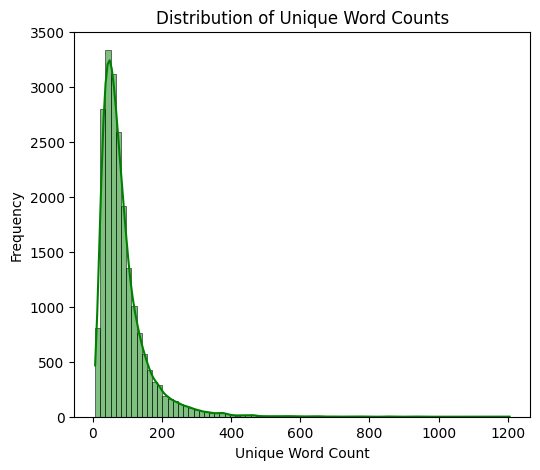

In [19]:
# Distribution of Review  Word Lengths

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['word_count'], bins=80, kde=True, color='purple')
plt.title("Distribution of Review Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Frequency")


# Distribution of Review Char Lengths

plt.subplot(1, 3, 2)
sns.histplot(df['char_count'], bins=80, kde=True, color='blue')
plt.title("Distribution of Review Character Counts")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.show()


# Distribution of Unique word Lengths
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 3)
sns.histplot(df['unique_word_count'], bins=80, kde=True, color='green')
plt.title("Distribution of Unique Word Counts")
plt.xlabel("Unique Word Count")
plt.ylabel("Frequency")
plt.show()



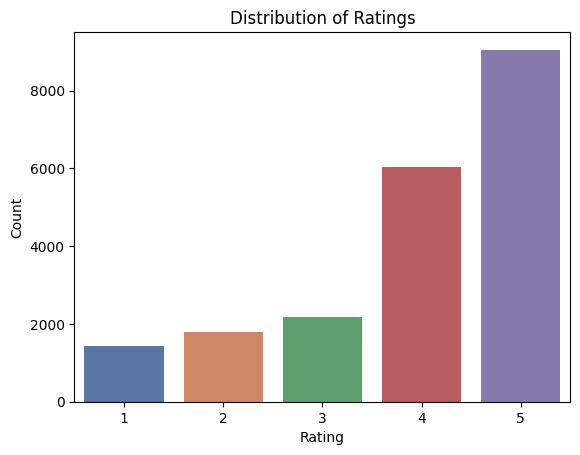

In [20]:
# Plot Rating Distribution

sns.countplot(x='Rating', data=df,	palette="deep")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

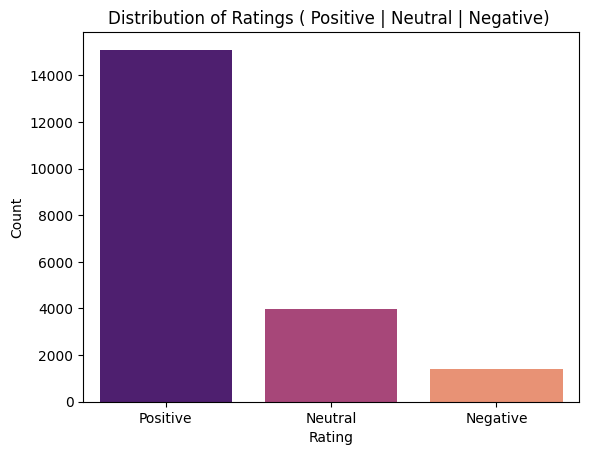

In [21]:
def Rating_label(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 2 or rating == 3 :
        return "Neutral"
    else:
        return "Negative"
df['Rating'] = df['Rating'].apply(Rating_label)

sns.countplot(x='Rating', data=df, palette="magma")
plt.title("Distribution of Ratings ( Positive | Neutral | Negative) ")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [22]:
df.value_counts("Rating")

,count
Rating,
Positive,15093
Neutral,3977
Negative,1421


>##### Encode ["Rating"] labels numerically (Negative=0, Neutral=1, Positive=2)

### Step3. Text Cleaning & Preprocessing

In [23]:
# Import the necessary libraries
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer , PorterStemmer
from nltk.tokenize import word_tokenize

In [24]:
# Downloads necessary NLP resources
nltk.download('punkt', quiet=True)      # Tokenizer (splits text into words/sentences)
nltk.download('stopwords', quiet=True)  # List of common stopwords (e.g., "the", "is", "in")
nltk.download('wordnet', quiet=True)     # WordNet dictionary for lemmatization (reducing words to base form)


True

In [25]:
# Load Stopwords and Lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Function to clean text
def clean_text(text):
    text = text.lower()      # Convert to lowercase
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    tokens = text.split()  # Tokenize
    # Remove Stopwords and Lemmatize
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join back to a single string
    cleaned_text = ' '.join(cleaned_tokens)
    # return function
    return cleaned_text

# Apply cleaning function
df["Cleaned_Review"] = df["Review"].apply(clean_text)
df.head(4)


,Review,Rating,word_count,char_count,unique_word_count,Cleaned_Review
0,nice hotel expensive parking got good deal sta...,Positive,87,593,77,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,Neutral,250,1689,188,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,Neutral,217,1427,161,nice room experience hotel monaco seattle good...
3,"unique, great stay, wonderful time hotel monac...",Positive,89,600,75,unique great stay wonderful time hotel monaco ...


In [26]:
print(df["Rating"].unique())  # Check unique values in the Rating column


['Positive' 'Neutral' 'Negative']


In [27]:
# Generate Text for Each Sentiment Category
positive_text = " ".join(df[df['Rating'] == "Positive"]['Cleaned_Review'])
neutral_text = " ".join(df[df['Rating'] == "Neutral"]['Cleaned_Review'])
negative_text = " ".join(df[df['Rating'] == "Negative"]['Cleaned_Review'])

# Print Sample Text from Each Category
print("\033[1m Positive Text Sample:\033[0m", positive_text[:500])  # First 500 characters of positive reviews
print("*" * 150)
print("\033[1m Neutral Text Sample:\033[0m", neutral_text[:500])  # First 500 characters of neutral reviews
print("*" * 150)
print("\033[1m Negative Text Sample:\033[0m", negative_text[:500])  # First 500 characters of negative reviews


 Positive Text Sample: nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous review valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillow soundproof like heard music room night morning loud bang door opening closing hear people talking hallway maybe noisy neighbor aveda bath product nice goldfish stay nice touch taken advantage staying longer location great walking distance shoppin
******************************************************************************************************************************************************
 Neutral Text Sample: ok nothing special charge diamond member hilton decided chain shot th anniversary seattle start booked suite paid extra website description suite bedroom bathroom standard hotel room took printed reservation desk showed said thing like tv couch ect desk clerk told oh mixed suite description kimpton web

### Step4. Word Frequency Analysis

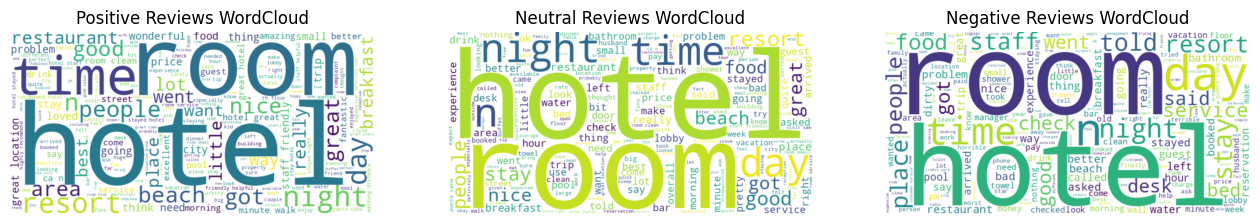

In [28]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(16, 10))  # (w*h)

# Create Word Cloud for Positive Reviews
plt.subplot(1, 3, 1)
wordcloud_pos = WordCloud(background_color='white', width=800, height=400).generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title("Positive Reviews WordCloud")
plt.axis("off")

# Create Word Cloud for Neutral Reviews
plt.subplot(1, 3, 2)
wordcloud_pos = WordCloud(background_color='white', width=800, height=400).generate(neutral_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title("Neutral Reviews WordCloud")
plt.axis("off")

# Create Word Cloud for Negative Reviews
plt.subplot(1, 3, 3)
wordcloud_neg = WordCloud(background_color='white', width=800, height=400).generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title("Negative Reviews WordCloud")
plt.axis("off")

# Show both Word Clouds
plt.show()

### Encode binary variables into label encoder(e.g 0/1 columns)

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()   # to convert categorical variable to numerical

# Encode ["Rating_Encoded"] labels numerically (Negative=0, Neutral=1, Positive=2)
df["Rating"] = label_encoder.fit_transform(df["Rating"])
df.sample(4)


,Review,Rating,word_count,char_count,unique_word_count,Cleaned_Review
2750,awsome girlfriend stayed beach hotel summer.. ...,2,45,283,38,awsome girlfriend stayed beach hotel summer lo...
19734,"great stay soho stayed soho 3 nights loved, sh...",2,224,1429,176,great stay soho stayed soho night loved short ...
14446,"fantastic hotel well..what say, hotel absolute...",2,66,482,63,fantastic hotel well say hotel absolutely fant...
5581,loved david hotel just returned 8 night stay d...,2,77,561,65,loved david hotel returned night stay david ho...


### Step5.  Word Embeddings Convert text to numerical vectors

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Convert text to numerical vectors

# Transform the cleaned text column
X = tfidf.fit_transform(df["Cleaned_Review"])
y = df["Rating"]
print(X)
print(y)
print("*"*50)

# Show shape of vectorized data
print(f"TF-IDF Matrix Shape: {X.shape}")


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1454202 stored elements and shape (20491, 5000)>
  Coords	Values
  (0, 2918)	0.263016259216889
  (0, 2146)	0.0630524023999512
  (0, 1572)	0.09115005047116258
  (0, 3140)	0.3058209121169301
  (0, 1926)	0.06796925238616981
  (0, 1922)	0.04661835643851199
  (0, 1156)	0.09660470567149997
  (0, 4244)	0.08873558326171413
  (0, 168)	0.1327149195680717
  (0, 247)	0.08240281374751185
  (0, 2444)	0.09654862572330113
  (0, 1519)	0.09075778466084723
  (0, 4551)	0.08360620701318704
  (0, 77)	0.12355057999360396
  (0, 3381)	0.11585960493754706
  (0, 3713)	0.07113018948509806
  (0, 4745)	0.12848072535321559
  (0, 765)	0.07579479643496487
  (0, 3472)	0.11086911200010678
  (0, 1407)	0.08830082075946101
  (0, 2530)	0.06649722891266259
  (0, 1273)	0.10108298765262096
  (0, 2939)	0.11284318174082171
  (0, 1561)	0.17638757621299456
  (0, 4785)	0.06739138331845276
  :	:
  (20490, 1036)	0.0952494931569303
  (20490, 659)	0.1021900963358161
  (20490